In [1]:
# takes in a and b from the (a,b)-benzel and returns the barycentric coordinates of said benzel
def benzel_cell_coords(a,b):
    c = max(a,b)
    result = set()
    # this range is too big, but not that much too big
    for i in range(-c, c+1):
        for j in range(-c, c+1):
            for k in range(-c, c+1):
                # these are the inequalities written by Jim in "20 Open Problems" 
                if (i+j+k==1 and 
                    -(a-1) <= j-i <= (b-1) and 
                    -(a-1) <= k-j <= (b-1) and 
                    -(a-1) <= i-k <= (b-1)
                   ):
                    result.add((i,j,k))
    return result


# returns the square centered at the given point p, taken in as a tuple
def square_centered_at(p):
    return [
        p + vector((3,0)),
        p + vector((0,+3)),
        p + vector((-3,0)),
        p + vector((0,-3)),
    ]

For the following functions, we used the fact that the table in "20 Open Problems" problem 5

$$\begin{array}{c|ccccccccc}
a\backslash b & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\\hline
2 & 1 \\
3 & & 0 & 1\\
4 & & 1 & 2 & 0 & 1\\
5 & & & 0 & 1 & 4 & 0 & 1\\
6 & & & 1 & 4 & 0 & 1 & 10 & 0 & 1\\
7 & & & & 0 & 1 & 8 & 0 & 1 & 28\\
8 & & & & 1 & 10 & 0 & 1 & 24 & 0 \\
9 & & & & & 0 & 1 & 24 & 0 & 1\\
10 & & & & & 1 & 28 & 0 & 1 & 48
\end{array}$$

The pattern happens in $(n + i, n + 2*i)$ stripes continuing diagonally down-down-right, starting at $(n,n)$. So for the rest of the notebook instead of using $(a,b)$-benzels, we use $n$ as our start value, and $i$ as our step value. 

In [2]:
# returns the centers for cells in the benzel with barycentric coordinates 
# (i,j,k) contained in an (a,b) benzel
def benzel(step, start=7):
    v1 = vector((0, 2))
    v2 = vector((-3, -1))
    v3 = vector((3, -1))
    shift = vector((3*step, 0))
    return [(v1*i + v2*j + v3 * k + shift) for (i,j,k) in benzel_cell_coords(start + step, start + 2*step)]

# works mod three the x-value of an input coordinate. Shifts horizontally toward the origin
def compress(p):
    x = p[0]//3
    if x<0:
        return p - ceil((x-1)/3) * vector((3,3))
    else:
        return p + floor((x+1)/3) * vector((-3, 3))

# performs compression on every third column on the center points of a benzel pattern
def compressed_benzel(step, start = 7):
    return [compress(p) for p in benzel(step, start = start)]

# draws the line segmets in the benzel picture
def benzel_segments(step, start = 7):    
    segments = set()
    for p in compressed_benzel(step, start = start):
        corners = [tuple(u) for u in square_centered_at(p)]
        for i in range(4):
            a = corners[i-1]
            b = corners[i]
            slope = (b[1]-a[1])/(b[0]-a[0])
            mx = (a[0] + b[0])             
            if mx < 0:
                if (mx % 12) != 3 or slope != -1:
                    segments.add((corners[i-1], corners[i]))
            elif mx > 0:
                if (mx % 12) != 9 or slope != 1:
                    segments.add((corners[i-1], corners[i]))
    return segments

def show_benzel(step, start = 4, save = False, compressed = False, axes = False, draw = True):
    if compressed:
        benzel_cells = compressed_benzel(step, start = start)
    else:
        benzel_cells = benzel(step, start = start)
    p = (
        sum(polygon(square_centered_at(p), fill = False) for p in benzel_cells) +
        points(benzel_cells)
    )
    if draw:
        p.show(aspect_ratio=1, axes = axes)
    if save:
        p.save_image(str(start+step) + "-" + str(start+2*step) + "benzel.svg", aspect_ratio = 1, axes = False)
    if not draw:
        return p

def benzel_dual_segments(step, start = 7):    
    segments = set()
    compressed_list = compressed_benzel(step, start = start)
    x_min, x_max = min(compressed_list)[0], max(compressed_list)[0]
    y_min, y_max = min(compressed_list)[1], max(compressed_list)[1]
    for p in compressed_list:
        if p[0] == 0:
            segments.add(((p[0] - 3, p[1] + 3), tuple(p)))
            segments.add(((p[0] + 3, p[1] + 3), tuple(p)))
            
        elif p[0] >= x_min and p[1] <= y_max:
            if p[0] < 0:
                segments.add(((p[0] + 3, p[1] + 3), tuple(p)))
                if p[0] % 2 == 0 and p[0] != x_min:
                    segments.add(((p[0] - 3, p[1] + 3), tuple(p)))
                    
            if p[0] > 0:
                segments.add(((p[0] - 3, p[1] + 3), tuple(p)))
                if p[0] % 2 == 0 and p[0] != x_max:
                    segments.add(((p[0] + 3, p[1] + 3), tuple(p)))
    return segments

def show_dual_benzel(step, start = 4, save = False, compressed = False, axes = False, draw = True, color = "blue"):
    
    p = sum(line(e, color = color) for e in benzel_dual_segments(step, start = start))
    if draw:
        p.show(aspect_ratio=1, axes = axes)
    if save:
        p.save_image(str(start+step) + "-" + str(start+2*step) + "dual_benzel.svg", aspect_ratio = 1, axes = axes)
    if not draw:
        return p

## Below here is where you actually call the functions defined above. 

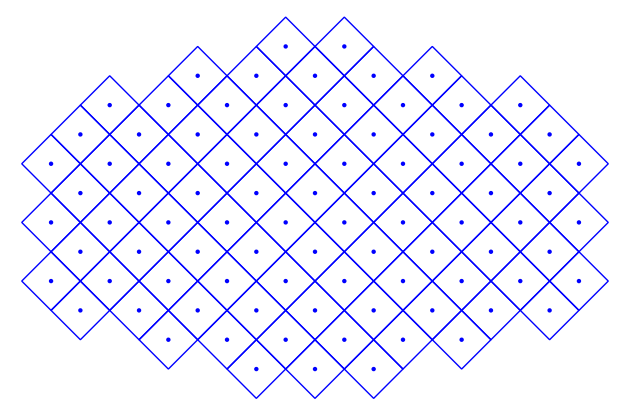

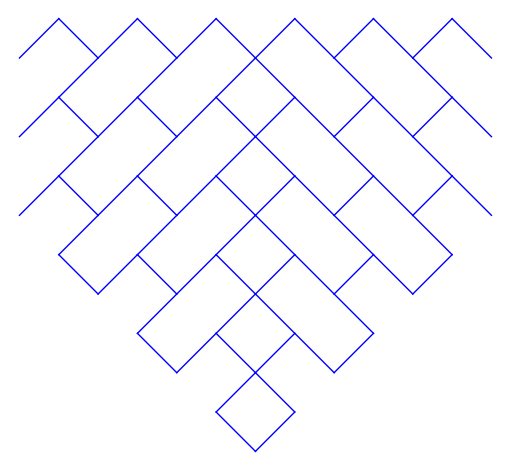

In [3]:
show_benzel(0, start = 10, draw = True, compressed = False, save = False)
show_dual_benzel(0, start = 10, save = False, draw = True)

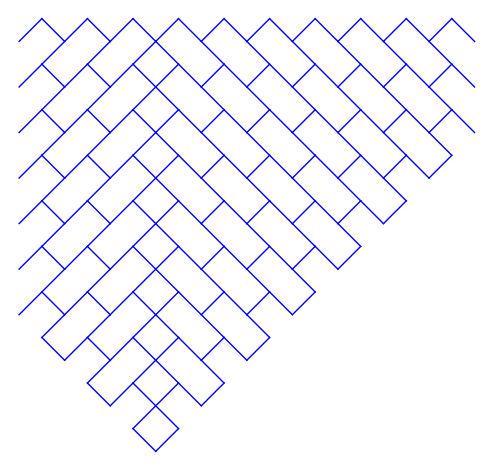

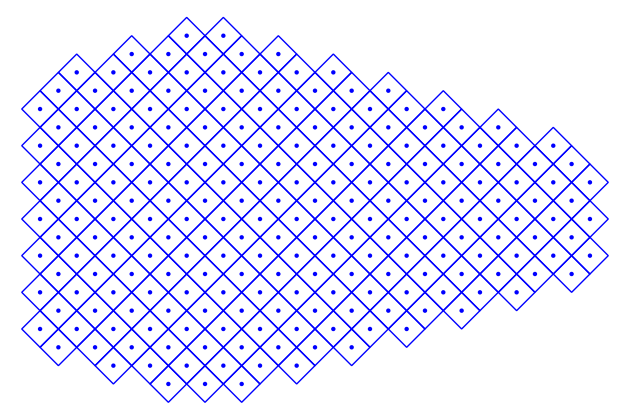

In [4]:
first = 4
second = 10

show_dual_benzel(first, second, save = True)
show_benzel(first, second, save = True)